In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
T = np.array([222.4, 283.7, 331.3, 358.5, 413.0, 520.0, 1079.7])
c_p = np.array([0.762, 1.354, 1.838, 2.118, 2.661, 3.631, 5.387])

k_b = 6.02*3.297*0.1

In [3]:
def fit_func(T, theta_E):
    return 3*k_b*( (theta_E / T)**2 ) * np.exp( theta_E / T ) / ( np.exp( theta_E / T ) -1   )**2

In [4]:
params = curve_fit(fit_func, T, c_p)
theta_E = params[0]

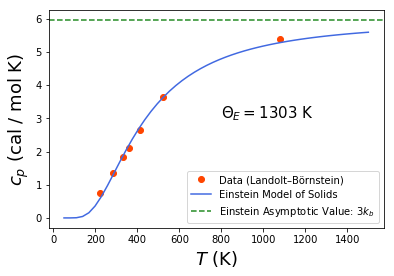

In [5]:
x = np.linspace(50, 1500)


plt.plot(T, c_p, 'o', color = 'orangered', label='Data (Landolt–Börnstein)')
plt.plot(x, fit_func(x, theta_E), color = 'royalblue', label='Einstein Model of Solids')
plt.axhline(y = 3*k_b, color = 'forestgreen',linestyle='--', label='Einstein Asymptotic Value: $3 k_b$')

plt.xlabel('$T$ (K)', fontsize=18)
plt.ylabel('$c_p$ (cal / mol K)', fontsize=18)
plt.legend(loc=4)
plt.text(800, 3,'$\Theta_E = %d$ K' % theta_E, fontsize=15)
plt.show()